In [1]:
# create the possibility of ditribution of each tasks in workflow
import networkx as nx
import random
    
    
def posibilityOfDistributionOfTasks(maxNumberOfTasks):
    import random
    maxNumberOfTasks = 16
    dPossibilityOfDistributionOfEachTask = {}
    for i in range(maxNumberOfTasks):
        a = random.random()
        if (a-0.5) < 0:
            dPossibilityOfDistributionOfEachTask[i+1] = 0
        else:
            dPossibilityOfDistributionOfEachTask[i+1] = (a - 0.5)
    return dPossibilityOfDistributionOfEachTask

In [2]:
import networkx as nx

from collections.abc import Iterable

# flatten Graph
def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el


# generate task
def generateTask(maxNumberOfTasks):

    listOfNodes = list(range(1,maxNumberOfTasks+1))
    listOfEdges = []
    adjancyList = {}
    adjancyList[listOfNodes[-1]] = []
    for i in listOfNodes[:-1]:
        a = random.random()
        #numbersInLayer = round(a/i * maxNumberOfTasks)
        numbersInLayer = round(posibilityOfDistributionOfTasks(maxNumberOfTasks)[i] * maxNumberOfTasks)
        maxNumber = i+numbersInLayer
        if maxNumber > maxNumberOfTasks:
            maxNumber = maxNumberOfTasks
        potentialChildNodes = list(range(i+2, maxNumber))

        childNodes = potentialChildNodes

        valInLists = list(flatten(list(adjancyList.values())))

        if (i+1) not in valInLists:
            listOfEdges.append([i, i+1])
            potentialChildNodes.append(i+1)
            
        adjancyList[i] = childNodes
        #adjancyList[i].append(i+1)
        #listOfEdges.append([i, i+1])
        for j in childNodes:
            listOfEdges.append([i,j])

    G = nx.DiGraph()
    G.add_edges_from(listOfEdges)

    for node in list(G.nodes()):
        if not nx.has_path(G,node,maxNumberOfTasks):
            adjancyList[node].append(maxNumberOfTasks)
            listOfEdges.append([node,maxNumberOfTasks])
    
    #print(adjancyList)
    
    G.add_edges_from(listOfEdges)
    return G

This graph is DAG? True


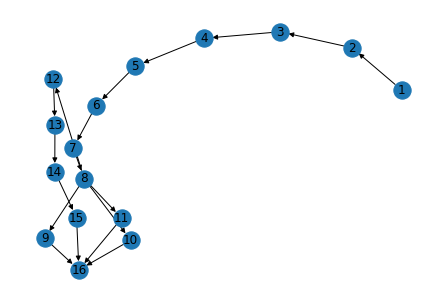

In [3]:
numbersOfTasks = 16
G = generateTask(numbersOfTasks)
print("This graph is DAG?",nx.is_directed_acyclic_graph(G)) # check if graph is DAG
nx.draw(G, with_labels = True) # draw

In [4]:
# список сопряженности
list(G.adjacency())

[(1, {2: {}}),
 (2, {3: {}}),
 (3, {4: {}}),
 (4, {5: {}}),
 (5, {6: {}}),
 (6, {7: {}}),
 (7, {8: {}}),
 (8, {9: {}, 10: {}, 11: {}, 12: {}}),
 (9, {16: {}}),
 (10, {16: {}}),
 (11, {16: {}}),
 (12, {13: {}}),
 (13, {14: {}}),
 (14, {15: {}}),
 (15, {16: {}}),
 (16, {})]

In [5]:
#numbers Of Nodes and edges
numbersOfNodes = len(G.nodes())
numbersOfEdges = len(G.edges())
print("numbersOfNodes:", numbersOfNodes,"numbersOfEdges:",numbersOfEdges)

numbersOfNodes: 16 numbersOfEdges: 18


In [6]:
# набор машин из AWS Amazon
CPU = [8,16,64, 96]
memory = [16,32,64,128, 256]
HDD = [475,600,2400,3600]
price = [0.3616, 0.824, 3.616, 5.712] # USD цены по каждому CPU. Почасовой тариф. Цена меняется только в зависомоти от CPU. по остальным параметрам взяты средние, потому что не значительно менются в цене. 

In [7]:
# набор машин из AWS Amazon
CPU = [8,16,64, 96]
memory = [16,32,64,128, 256]
HDD = [475,600,2400,3600]
price = [0.3616, 0.824, 3.616, 5.712] # USD цены по каждому CPU. Почасовой тариф. Цена меняется только в зависомоти от CPU. по остальным параметрам взяты средние, потому что не значительно менются в цене. 

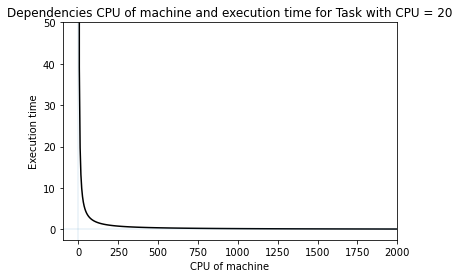

In [8]:
# ищем коэффициерт зависимости времени от cpu для каждой задачи (в данном упрощенном случае подчиняется закону гиперболы) = 
def plotDependenciesOfCPUForParticulatTask(cpuOfTask):
    import numpy as np
    import matplotlib.pyplot as plt


    x = np.linspace(0.1, cpuOfTask*100, 400)
    y = np.linspace(0.1, 50, 400)
    x, y = np.meshgrid(x, y)
    def axes():
        plt.axhline(0, alpha=.1)
        plt.axvline(0, alpha=.1)
        plt.xlabel("CPU of machine")
        plt.ylabel("Execution time")
        plt.title("Dependencies CPU of machine and execution time for Task with CPU = %s" %cpuOfTask)
    a = 2
    b = 1
    axes()
    plt.contour(x, y,(y - cpuOfTask*10/(x)), [0], colors='k')
    plt.show()
    
plotDependenciesOfCPUForParticulatTask(20)

In [9]:
def calculationOfExecutionTime(cpuOfTask, cpuOfMachine, MemoryOfTask, HDDOfMachine): # считаем время выполнения задачи на определнной машине
    executionTime = cpuOfTask*10/cpuOfMachine + MemoryOfTask/HDDOfMachine
    return executionTime

#print(calculationOfExecutionTime(76, 64, 13, 15), 'secоnds')
#print(calculationOfExecutionTime(76, 96, 13, 15), 'seconds')

In [10]:
class setOfMachines():
    setMachines = []

    def __init__(self, numbersOfMachines):
        self.numbersOfMachines = numbersOfMachines
        self.setFreeMachines = []
        self.setMachines = []


    def addMachines(self, machine):
        self.setMachines.append(machine)
    def setOfFreeMachines(self):
        self.setFreeMachines = []
        for i in self.setMachines:
            if i.availability == "free":
                self.setFreeMachines.append(i)
        return self.setFreeMachines
    def freeMachineWithBestCPUWithRequiredMemory(self, requiredMemory):
        bestCPU = 0
        for i in self.setMachines:
            if i.memory >= requiredMemory and i.CPU > bestCPU and i.availability == "free":
                machineWithBestCPU = i
                bestCPU = i.CPU
        if bestCPU == 0:
            return None
        else:
            return machineWithBestCPU
    def averageValuesOfFreeMachines(self):
        
        averageCPU = sum([i.CPU for i in self.setMachines]) / len(self.setMachines)
        averageMemory = sum([i.memory for i in self.setMachines]) / len(self.setMachines)
        averageHDD = sum([i.HDD for i in self.setMachines]) / len(self.setMachines)

        return averageCPU, averageMemory, averageHDD
    
    def priceOfAllAvailableMachines(self):
        commonPriceOfAllMachines = sum([i.price for i in self.setMachines])
        return commonPriceOfAllMachines

         
    

    
    
class machine():
    def CPU(self, CPU):
        self.CPU = CPU
    def memory(self, memory):
        self.memory = memory
    def HDD(self, HDD):
        self.HDD = HDD
    def availability(self, available):
        self.available = available
    def price(self, price):
        self.price = price

In [11]:
def calculateThePartsOfTask(G):
    dTree = {}
    dTree[1] = 1
    for node in G.nodes():
        childNodes = list(G.neighbors(node))
        if len(childNodes) != 0:
            for child in childNodes:
                if child in dTree:
                    dTree[child] += dTree[node] / len(childNodes)
                else:
                    dTree[child] = dTree[node] / len(childNodes)
    return dTree

def calculationOfExecutionTime(cpuOfTask, cpuOfMachine, MemoryOfTask, HDDOfMachine): # считаем время выполнения задачи на определнной машине
    executionTime = cpuOfTask*10/cpuOfMachine + MemoryOfTask/HDDOfMachine
    return executionTime

In [12]:
def calculationOfExecutionTime(cpuOfTask, cpuOfMachine, MemoryOfTask, HDDOfMachine):
    executionTime = cpuOfTask*10/cpuOfMachine + MemoryOfTask/HDDOfMachine
    return executionTime

In [13]:
def calculateThePartsOfTask(G):
    dTree = {}
    dTree[1] = 1
    for node in G.nodes():
        childNodes = list(G.neighbors(node))
        if len(childNodes) != 0:
            for child in childNodes:
                if child in dTree:
                    dTree[child] += dTree[node] / len(childNodes)
                else:
                    dTree[child] = dTree[node] / len(childNodes)
    return dTree


In [14]:
def calculateExecutedTimeInEachNode(parentNode, CPUOfTask, memoryOfTask, G, visited = []):
    partsOfTask = calculateThePartsOfTask(G)
    childNodes = G.neighbors(parentNode)
    #print(list(G.adjacency()))
    #print(list(G.neighbors(parentNode)))
    
    numbersOfChildNodes = len(list(G.neighbors(parentNode)))
    
    
    #print(list(childNodes), numbersOfChildNodes, len(list(childNodes)))
    
    #CPUOfTask = CPUOfTask + 10
    #memoryOfTask = memoryOfTask + 10 
    calculationOfExecutionTimes = 0
    #print(parentNode, numbersOfChildNodes)
    #if numbersOfChildNodes != 0:
                
    #    onePartOfTask = partsOfTask[list(childNodes)[0] - 1]
    
    if numbersOfChildNodes == 1 and list(G.neighbors(parentNode))[0] not in visited:
        
        onePartOfTask = partsOfTask[list(G.neighbors(parentNode))[0]]

        # считаем время выполнения задачи на какой-то машине с учетом CPU и HDD

        # здесь считаем как будто задача выполлняется на одной машине
        #calculationOfExecutionTimeCPU = calculationOfExecutionTime(CPUOfTask, setOfAllMachines.freeMachineWithBestCPUWithRequiredMemory(memoryOfTask).CPU, memoryOfTask, setOfAllMachines.freeMachineWithBestCPUWithRequiredMemory(memoryOfTask).HDD)


        # здесь считаем, что выполняется параллельно на всех свободных машинах. Считаем время для средних значений на всех машинах и делим на общее кол-во свободных машин
    
        numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())

        calculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines
        #print(onePartOfTask,calculationOfExecutionTimeParalell)
        calculationOfExecutionTimes += calculationOfExecutionTimeParalell
        
        CPUOfTask = CPUOfTask + 10
        memoryOfTask = memoryOfTask + 10 

        # предположим, что параметры задания увеличиваются с каждой дальнейшей операцией


    elif numbersOfChildNodes > 1:
        
        calculationOfExecutionTimes = 0
        for i in G.neighbors(parentNode):
            if i not in visited:
                onePartOfTask = partsOfTask[i]
                numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())
                calculationOfExecutionTimes +=  calculationOfExecutionTime(CPUOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/len(setOfAllMachines.setOfFreeMachines())


        CPUOfTask = (CPUOfTask + 10) # так как задача рандомная, будем считать, что сложность увеличивается от подзадачим к подзадачи, а так же увелиичвается память
        memoryOfTask = (memoryOfTask + 10)
        
    elif numbersOfChildNodes == 0:
        calculationOfExecutionTimes = 0
        CPUOfTask = 0
        memoryOfTask = 0
    
    visited.extend(list(childNodes))
        
    return calculationOfExecutionTimes, CPUOfTask, memoryOfTask, visited

In [15]:
# generatimgf the machines
# put the price of each (price depends from hours)
# набор машин из AWS Amazon
# all available machines

CPU = [8,16,64, 96]
memory = [16,32,64,128, 256]
HDD = [475,600,2400,3600]

price = [0.3616, 0.824, 3.616, 5.712] # USD цены по каждому CPU. Почасовой тариф. Цена меняется только в зависомоти от CPU. по остальным параметрам взяты средние, потому что не значительно менются в цене. 

In [16]:
# нужно как-то добавить время передачи данных по проводам. Скорее всего это зависит от количесвта машин на которые мы распределяемю.
# пусть оно зависит от параметра memory.

In [17]:
def calculateTimeAndPrice(CPUOfTask, memeoryOfTask, numberOfMachines, setOfAllMachines, G):
    # put the parameters of tasks
    currentTime = 0
    outCPUOfTask = CPUOfTask
    outMemoryOfTask = memoryOfTask

    commonPrice = 0 # стоимость работы. зависит от времени и машин

    numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())
    calculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines
    currentTime = calculationOfExecutionTimeParalell # ставим время выполнения певрого задания за первоначальное
    #commonPrice = sum(price) * currentTime

    visited = []
    for parentNode in G.nodes():
        calculationOfExecutionTimeInChildNodes, outCPUOfTask, outMemoryOfTask, visited = calculateExecutedTimeInEachNode(parentNode, outCPUOfTask, outMemoryOfTask, G, visited)
        currentTime += calculationOfExecutionTimeInChildNodes
        #print(calculationOfExecutionTimeInChildNodes)
        #commonPrice += sum(price) * currentTime

        #print(parentNode, calculationOfExecutionTimeInChildNodes)

        
    #print("Time of all calculation is ",currentTime)
    #print("Common price for one workflow in USD (depends on time)", currentTime * setOfAllMachines.priceOfAllAvailableMachines())




    # пусть количевсто компьютеров и memory имеют прямую зависимость со временем выполнения

    timeForTransferData = numberOfMachines * memoryOfTask / 50

    commonTime = currentTime + timeForTransferData

    #print("Common time for calculation and transfer",commonTime )
    return commonTime, currentTime * setOfAllMachines.priceOfAllAvailableMachines()

In [18]:
import random
CPUOfTask = 10
memoryOfTask = 15

numberOfMachines = 5
setOfAllMachines = setOfMachines(5)


# generate parameters of machines
for i in range(numberOfMachines):
    a = random.random()
    b = random.random()
    c = random.random()
    
    m1 = machine()
    m1.CPU = CPU[round(a * (len(CPU) - 1))]
    m1.memory = memory[round(b * (len(memory) - 1))]
    m1.HDD =  HDD[round(c * (len(HDD) - 1))]
    m1.availability = "free"
    m1.price = price[round(a * (len(price) - 1))]
    m1.timeOfDeliverance = -1
    setOfAllMachines.addMachines(m1)
    
    
calculateTimeAndPrice(100, 20, 3, setOfAllMachines, G)

(90.9051711309524, 831.7917895238096)

In [19]:
def selectSeveralSuitableConfigaration(limitBudget, numberOfMachines, CPUOfTask, memoryOfTask, G):
    import math

    bestTime = math.inf 
    suitableCPUForThisBudget = {}

    
    timeForTransferData = numberOfMachines * memoryOfTask / 50

    for i in range(len(CPU)):
        setOfAllMachines = setOfMachines(numberOfMachines)        
        for resource in range(numberOfMachines):
            # считаем время и стоимость для минимальной конфигурации текущего CPU
            m1 = machine()
            m1.CPU = CPU[i]
            m1.memory = memory[0]
            m1.HDD =  HDD[0]
            m1.availability = "free"
            m1.price = price[i] + memory[0] /3000  +  HDD[0] / 30000
            setOfAllMachines.addMachines(m1)

        timeForMinConf, budgetForMinConf = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
        #print(timeForMinConf, budgetForMinConf)

        
        
        setOfAllMachines = setOfMachines(numberOfMachines)        

        # считаем время и стоимость для максимальной конфигурации текущего CPU
        for resource in range(numberOfMachines):
            m1 = machine()
            m1.CPU = CPU[i]
            m1.memory = memory[len(memory)-1]
            m1.HDD =  HDD[len(HDD)-1]
            m1.availability = "free"
            m1.price = price[i] + memory[len(memory)-1] /3000  +  HDD[len(HDD)-1] / 30000
            setOfAllMachines.addMachines(m1)

        timeForMaxConf, budgetForMaxConf = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
        
        

        if limitBudget >= (budgetForMinConf):
            suitableCPUForThisBudget[i] = [timeForMinConf, timeForMaxConf]    
    return suitableCPUForThisBudget

In [20]:
def findMinimumTimeFromSuitableMachines(suitableCPUForThisBudget):

    configarationWithMinimumTime = {}

    # находим минимальное время обработки между наименьшими конфигурациями возможными
    configarationWithMinimumTime[min(suitableCPUForThisBudget.items(), key=lambda x: x[1][0])[0]] = [min(suitableCPUForThisBudget.items(), key=lambda x: x[1][0])[1]]
    MINiMIN = min(suitableCPUForThisBudget.items(), key=lambda x: x[1][0]) [1][0]
    # сравним это минимальное время со временем в остальных конфигурациях с наибольшим значением

    for key, val in suitableCPUForThisBudget.items():
        if val[1] <= MINiMIN:
            configarationWithMinimumTime[key] = val


    print(configarationWithMinimumTime)
    
    return configarationWithMinimumTime

In [21]:
def findBestMachines(configarationWithMinimumTime, limitBudget, numberOfMachines,memoryOfTask, G, CPUOfTask):
    
    timeForTransferData = numberOfMachines * memoryOfTask / 50
    memoryBest = math.inf
    bestTime = math.inf 
    for key, val in configarationWithMinimumTime.items():
        for j in range(len(memory)):
            for z in range(len(HDD)):
                setOfAllMachines = setOfMachines(numberOfMachines)        
                for resource in range(numberOfMachines):
                    m1 = machine()
                    m1.CPU = CPU[key]
                    m1.memory = memory[j]
                    m1.HDD =  HDD[z]
                    m1.availability = "free"
                    m1.price = price[key] + memory[j] /3000  +  HDD[z] / 30000
                    setOfAllMachines.addMachines(m1)

                timeForConf, budgetForConf = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
                #print(timeForMinConf, budgetForMinConf)


                # считаем время и стоимость для максимальной конфигурации текущего CPU

                if (timeForConf + timeForTransferData) <= bestTime and limitBudget >= budgetForConf:
                    bestTime = timeForConf
                    budget = budgetForConf
                    CPUBest = key
                    memoryBest = j
                    HDDBest = z

    print("CPUBest",CPU[key],"memoryBest", memory[memoryBest],"HDDBest", HDD[HDDBest],"bestTime", bestTime,"bestBudget in USD", budget)
    return CPUBest, memoryBest, HDDBest, bestTime, budget

In [22]:
# общий алгоритм
def bestConfuguration(limitBudget, numberOfMachines,CPUOfTask, memoryOfTask, G):
    suitableCPUForThisBudget = selectSeveralSuitableConfigaration(limitBudget, numberOfMachines,  CPUOfTask, memoryOfTask, G) # budgetLimit, numberOfMachines
    if len(suitableCPUForThisBudget) < 1:
        return -1
    else:
        configarationWithMinimumTime = findMinimumTimeFromSuitableMachines(suitableCPUForThisBudget)
        bestMachine = findBestMachines(configarationWithMinimumTime, limitBudget, numberOfMachines,memoryOfTask, G, CPUOfTask)
        return bestMachine

In [23]:
# задаем параметры CPUOfTask, memoryOfTask, budgetLimit, numberOfTask in Graph

'''
def findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, numberOfTask):
    
    G = generateTask(numberOfTask)
    import math
    numberOfMachines = 1
    bestTimeForNumberOfMachines = math.inf
    currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines, CPUOfTask, memoryOfTask, G)
    currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
    while currentBestConfForNumberOfMachines[4] < budgetLimit and (numberOfMachines * memoryOfTask / 50) < bestTimeForNumberOfMachines and currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
        #currentBestTimeForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines)[3]

        if  currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
            bestTimeForNumberOfMachines = currentBestTimeForNumberOfMachines
            bestConfiguration = currentBestConfForNumberOfMachines
            
        
        currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines+1, CPUOfTask, memoryOfTask, G)

        currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        numberOfMachines += 1
    print("optimal number of machines", numberOfMachines,'', "best Time For Number Of Machines", bestTimeForNumberOfMachines)
    return numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration


def findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, G):
    
    import math
    numberOfMachines = 1
    bestTimeForNumberOfMachines = math.inf
    currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines, CPUOfTask, memoryOfTask, G)
    currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
    
    
    while currentBestConfForNumberOfMachines[4] < budgetLimit  and (numberOfMachines * memoryOfTask / 50) < bestTimeForNumberOfMachines and currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
        #currentBestTimeForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines)[3]

        if  currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
            bestTimeForNumberOfMachines = currentBestTimeForNumberOfMachines
            bestConfiguration = currentBestConfForNumberOfMachines
            
        currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines+1, CPUOfTask, memoryOfTask, G)
        currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        numberOfMachines += 1
    print("optimal number of machines", numberOfMachines,'', "best Time For Number Of Machines", bestTimeForNumberOfMachines)
    return numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration
'''

def findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, G):
    
    import math
    numberOfMachines = 1
    bestTimeForNumberOfMachines = math.inf
    currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines, CPUOfTask, memoryOfTask, G)
    
    if currentBestConfForNumberOfMachines == -1:
        print("увеличьте бюджет или упростите конфигурацию")
        return None, None, None
    
    currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        
    while True and currentBestConfForNumberOfMachines[4] < budgetLimit  and (numberOfMachines * memoryOfTask / 50) < bestTimeForNumberOfMachines:
        #currentBestTimeForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines)[3]

        if  currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
            bestTimeForNumberOfMachines = currentBestTimeForNumberOfMachines
            bConfiguration = currentBestConfForNumberOfMachines
            bestNumberOfMachine = numberOfMachines
            
        currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines+1, CPUOfTask, memoryOfTask, G)
        print(currentBestConfForNumberOfMachines)
        if currentBestConfForNumberOfMachines == -1:
            break
        currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        numberOfMachines += 1
    print("optimal number of machines", bestNumberOfMachine,'', "best Time For Number Of Machines", bestTimeForNumberOfMachines)
    return bestNumberOfMachine, bestTimeForNumberOfMachines, bConfiguration

In [24]:
# задаем параметры CPUOfTask, memoryOfTask, budgetLimit, numberOfTask in workflow
import math

numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration = findNumberOfMachine(100000, 1000, 150000, G)

print(numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration)

#print(f"Best results algorithm shows in {numberOfMachines} machines with following configuration CPU = {bestConfiguration[0]}, memoryBest = {bestConfiguration[1]}. Common time = {bestTimeForNumberOfMachines}")

{1: [120562.05981555452, 120562.03240327381]}
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 120562.05981555452 bestBudget in USD 101894.78067077948
{0: [120562.34402608084, 120562.33031994049]}
CPUBest 8 memoryBest 16 HDDBest 475 bestTime 120562.34402608084 bestBudget in USD 92294.03377676575
(0, 0, 0, 120562.34402608084, 92294.03377676575)
{0: [99729.3054295896, 99729.2962921627]}
CPUBest 8 memoryBest 16 HDDBest 475 bestTime 99729.3054295896 bestBudget in USD 114518.12795479773
(0, 0, 0, 99729.3054295896, 114518.12795479773)
{0: [89312.93613134399, 89312.92927827382]}
CPUBest 8 memoryBest 16 HDDBest 475 bestTime 89312.93613134399 bestBudget in USD 136742.22213282975
(0, 0, 0, 89312.93613134399, 136742.22213282975)
-1
optimal number of machines 4  best Time For Number Of Machines 89312.93613134399
4 89312.93613134399 (0, 0, 0, 89312.93613134399, 136742.22213282975)


In [25]:
# application to the task MNIST

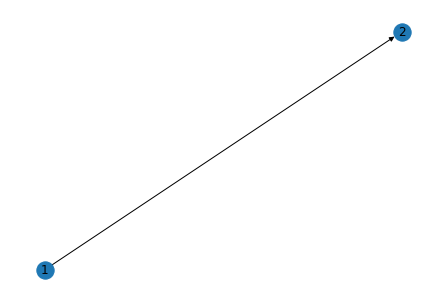

In [26]:
memoryOfTask = 4.32
CPUOfTask = 30 # сложность взята как время выполнения на локальной машине
budgetLimit = 16

import networkx as nx
numberOfTask = 2 # как две эпохи
G = nx.DiGraph()
listOfNodes = list(range(1,numberOfTask+1))
listOfEdges = [[1,2]] 
G.add_edges_from(listOfEdges)
nx.draw(G, with_labels = True) # draw

In [27]:
# CPUOfTask, memoryOfTask, budgetLimit, G
numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration = findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, G)


{0: [39.38210902255639, 39.37421428571428]}
CPUBest 8 memoryBest 16 HDDBest 475 bestTime 39.38210902255639 bestBudget in USD 15.041087556867168
{0: [20.71396165413534, 20.710014285714283]}
CPUBest 8 memoryBest 16 HDDBest 475 bestTime 20.71396165413534 bestBudget in USD 15.724943951629074
(0, 0, 0, 20.71396165413534, 15.724943951629074)
-1
optimal number of machines 2  best Time For Number Of Machines 20.71396165413534
